# FEATURE ENGINEERING

### What is feature engineering?
> Feature engineering is the process of using **domain knowledge** to extract features from raw data via data mining techniques. -*Wikipedia*

Feature engineering is the most important art in machine learning which creates the huge diferrence between a good model and a bad model

### Goals of Feature Engineering
* Preparing the proper input dataset, compatible with the machine learning algorithm requirements
* Improving the performance of machine learning models

### Steps to feature engineering
* **Brainstorm features:** Take a deep look into the data to get an insight so as to generate new features.
* **Create features:** After brainstorming, you then generate the features from the existing features.
* **Select features:** Select the features of High Importance.
* **Evalute model:** Train a model to see how well the model perform with the new generated features

### List of Featuring Engineering Techniques
* Imputation
* Handling Outliers
* Binning
* Log Tranform
* One-Hot Encoding
* Grouping Operations
* Scaling

Feature Engineering could be Manual or Automated. To perform manual feature engineering, you must have the domain knowledge to the features

Let's do some examples using the Titanic dataset

In [1]:
# Adjusting the plots to the center
from IPython.core.display import HTML
HTML("""""
<style>
.output_png {
    display: table-cell;
    text-align: centre;
    vertical-align: middle;
}
</style>
""");

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To make this notebook's output stable across runs
np.random.seed(42)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
import os

def load_dataset(path, filename):
    csv_path = os.path.join(path, filename)
    return pd.read_csv(csv_path)

In [4]:
# Load the dataset
PATH = 'C:/Users/OTETE JOSHUA/Desktop/feature_engineering_tutorial'

data = load_dataset(PATH, 'titanic.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here we can see that we have both categorical features and numerical features. The dataset contains missing values, so we have to deal with them

In [6]:
# Check the number of missing values for each features
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we could delete them, but have a small dataset

In [7]:
# Fill missing values of Embarked with Mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [9]:
# Handle missing value of cabin by giving '1' to cabin data with valid Cabin no. and '0' to tag with NaN.
def impute_cabin(col):
    Cabin = col[0]
    if type(Cabin) == str:
        return 1
    else:
        return 0

data['Cabin'] = data[['Cabin']].apply(impute_cabin, axis=1)

In [10]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


Convert categorical features to numerical

In [12]:
# Mapping Embarked
embarked_sex = {'male': 1, 'female': 0}
data['Sex'] = data['Sex'].map(embarked_sex).astype(int)

# Mapping Embarked
embarked_map = {'S': 0, 'C': 1, 'Q': 2}
data['Embarked'] = data['Embarked'].map(embarked_map).astype(int)

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0


Let's train the data without Feature engineering to see the performance

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

train = data.copy()
train = train.drop('Name', axis=1)
train = train.drop('Ticket', axis=1)

In [15]:
y = train.Survived
x = train.drop("Survived", axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
clf_1 = RandomForestClassifier()
clf_1.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
clf_1.score(X_test, y_test)

0.823728813559322

80%.... Whaooo

## FEATURE ENGINEERING

Adding certain columns:-
1. Adding a column denoting the family size.
2. adding a column denoting whether the passenger travelled alone or not

In [18]:
data['family_size'] = data['SibSp'] + data['Parch'] + 1
data['is_alone'] = 0
data.loc[data['family_size']==1, 'is_alone'] = 1 # if family_size == 1, then is_alone should be 1, else 0

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,0,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1,1


In [20]:
# Train to see the imporvement
train_0 = data.copy()
y_0 = train_0.Survived
x_0 = train_0.drop(["Survived", "Name", "Ticket"], axis=1)

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(x_0, y_0, test_size=0.33, random_state=42) # Split data

clf_2 = RandomForestClassifier()
clf_2.fit(X_train_0, y_train_0)

RandomForestClassifier()

In [21]:
clf_2.score(X_test_0, y_test_0)

0.8271186440677966

There seems to be a little improvement

In [22]:
# Let's analyse the name
data['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [23]:
# Get title from the Name
data_title = [i.split(",")[1].split(".")[0].strip() for i in data["Name"]]

# Add data_title to the main dataset named 'Title'
data['Title'] = pd.Series(data_title)

# Count
data["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Sir               1
Don               1
Lady              1
Ms                1
Mme               1
Jonkheer          1
the Countess      1
Capt              1
Name: Title, dtype: int64

In [24]:
# Means per title
print(data.groupby('Title')['Age'].mean())

Title
Capt            70.000000
Col             58.000000
Don             40.000000
Dr              40.242731
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           7.086662
Miss            23.341584
Mlle            24.000000
Mme             24.000000
Mr              31.753762
Mrs             35.055080
Ms              28.000000
Rev             43.166667
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64


In [25]:
# Convert to categorical values Title
data['Title'] = data['Title'].replace(['Lady', 'the Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major',
                                      'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

data['Title'] = data['Title'].map({"Master":0, "Mrs":1, "Mme":1, "Ms":1, "Mlle":1, "Miss":1,
                                   "Mr":2, "Rare":3})

data["Title"] = data["Title"].astype(int)

In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,is_alone,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,2,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,1,2,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,0,2,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1,1,2


In [27]:
# Train to see the imporvement
train_1 = data.copy()
y_1 = train_1.Survived
x_1 = train_1.drop(["Survived", "Name", "Ticket"], axis=1)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=0.33, random_state=42) # Split data

clf_3 = RandomForestClassifier()
clf_3.fit(X_train_1, y_train_1)

RandomForestClassifier()

In [28]:
clf_3.score(X_test_1, y_test_1)

0.8406779661016949

Whaooo.... what a great improvement

### Select features with high importance
Let's try to select important features to see if the accuracy will increase using varianece Threshold

In [29]:
# Select Features using  sklearn.feature_selection VarainceThreshold
from sklearn.feature_selection import VarianceThreshold

def variancethreshold(data):
    thresholds = np.arange(0.0, 0.45, 0.05) #thresholds to check
    results = []
    for thres in thresholds:
        tranform = VarianceThreshold(threshold=thres) #define threshold
        features = tranform.fit_transform(data) #transform
        n_features = features.shape[1]
        print('> Threshold=%.2f, Features=%d' %(thres, n_features))
        results.append(n_features)
        
    # plot the threshold vs the number of selected features
    plt.plot(thresholds, results)
    
    return features

> Threshold=0.00, Features=12
> Threshold=0.05, Features=12
> Threshold=0.10, Features=12
> Threshold=0.15, Features=12
> Threshold=0.20, Features=11
> Threshold=0.25, Features=9
> Threshold=0.30, Features=9
> Threshold=0.35, Features=9
> Threshold=0.40, Features=8


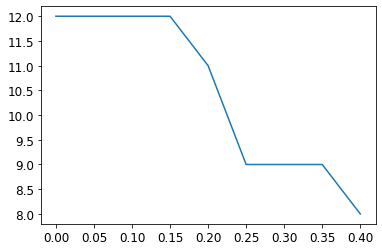

In [30]:
train_1_var = variancethreshold(x_1)

In [31]:
X_train_1_sel, X_test_1_sel, y_train_1_sel, y_test_1_sel = train_test_split(train_1_var, y_1, test_size=0.33, random_state=42)

clf_3_sel = RandomForestClassifier(random_state=42)
clf_3_sel.fit(X_train_1_sel, y_train_1_sel)

RandomForestClassifier(random_state=42)

In [32]:
clf_3_sel.score(X_test_1_sel, y_test_1_sel)

0.711864406779661

Increasing the threshold range reduces the accuracy.

There are som othe method of Feature selection

In [37]:
# Select Features using  sklearn.feature_selection SelectFromModel
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf_3, prefit=True)
train_reduced = model.transform(x_1)
print(train_reduced.shape)

(891, 5)


In [40]:
X_train_1_red, X_test_1_red, y_train_1_red, y_test_1_red = train_test_split(train_reduced, y_1, test_size=0.33, random_state=42)

#X_test_1_red.shape

clf_3_red = RandomForestClassifier(random_state=42)
clf_3_red.fit(X_train_1_red, y_train_1_red)

RandomForestClassifier(random_state=42)

In [41]:
clf_3_red.score(X_test_1_red, y_test_1_red)

0.8

Not a better result

### We can also enerate Features using interarction between them

In [41]:
# USing PolynomialFeatures in sklearn.preprocessing to create a two way interaction for all features
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    # Remove interaction terms with all zero values
    noint_indices = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indices], axis=1)
    
    return df

In [42]:
data.drop(['Name', "Ticket"], 1, inplace=True)

data_1 = add_interactions(data)
data_1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,...,Cabin_Embarked,Cabin_family_size,Cabin_is_alone,Cabin_Title,Embarked_family_size,Embarked_is_alone,Embarked_Title,family_size_is_alone,family_size_Title,is_alone_Title
0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
1,2.0,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,1.0,1.0,...,1.0,2.0,0.0,1.0,2.0,0.0,1.0,0.0,2.0,0.0
2,3.0,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,4.0,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,1.0,0.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0
4,5.0,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0


Lot of features was generated

In [43]:
# Train to see the imporvement
train_2 = data_1.copy()
y_2 = train_2.Survived
x_2 = train_2.drop(["Survived"], axis=1)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.33, random_state=42) # Split data

clf_4 = RandomForestClassifier()
clf_4.fit(X_train_2, y_train_2)

RandomForestClassifier()

In [44]:
clf_4.score(X_test_2, y_test_2)

1.0

Whaooooooooooo............... 100%. This is great

This show that generating new features can help improve the performance and accuracy of the Model

Lastly, There are so many others ways of generating new features(e.g KMeans clustering). Apart from that, there many automated feature tool
like:
* AutoFeat
* FeatureTools
* TsFresh
* PyFeat
* Cognito
* OneBM